# Demonstrating where Ridge regression is effective than Ordinary Least Squares by Simulation

Created in iPython Notebook 09/08/2015 by
Guduguntla Vamshi <gudugu@ncsu.edu>

** Description **
- Simulating m(=1000) data-sets each of n(=100) observations, with p(=10) covariates 
- Data set generated with p(=10) equal parameters of value k(=0.5,initially)
- Showing results by varying n,p,k,rho 
- Covariance between the predictors is given by Cov(Xj,Xl) = math.pow(rho,(j-l))

In [60]:
import pandas as pd
import numpy as np
import random
import math
from scipy.spatial.distance import pdist, wminkowski, squareform
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline  

** Simulate the 1000 data-sets as the Mean Squared Error for the OLS & Ridge Regression **
This follows the equation for regression : Y = beta * X + error , where error ~ N(0,1)

In [ ]:
def simulation_show(m,n,p,k,rho):
    beta = np.mat(np.repeat(k,10)).reshape((10, 1))
    sigma = np.power(rho,squareform(pdist(np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]))))
    sigma12 = np.linalg.cholesky(sigma)
    df = pd.DataFrame(columns=['Ordinary_LeastSq', 'RidgeRegression'])
    for i in range(m):
        random.seed(999*i)
        X = np.mat(np.random.randn(n, p))*np.mat(sigma12)
        Y = X * beta + np.mat(np.random.randn(n).reshape((100, 1)))
        # Fit the OLS:
        est_ols = sm.OLS(Y, X)
        est_ols = est_ols.fit()
        param_ols = np.mat(est_ols.params.reshape((10,1)))  
        #Fit the Ridge:
        ridge=linear_model.Ridge(alpha=.1)
        est_ridge = ridge.fit(Y,X)
        param_ridge = np.mat(est_ridge.coef_.reshape((10,1)))
    
    df.loc[i,'Ordinary_LeastSq'] = np.mean(np.power((param_ols - beta),2))
    df.loc[i,'RidgeRegression'] = np.mean(np.power((param_ridge - beta),2))
    return np.mean(df['Ordinary_LeastSq']),np.mean(df['RidgeRegression'])

** Compare Mean of MSE over m DataSets between OLE and Ridge Regression **
 1.Effect of Number of Covariates 

In [58]:
m,n,k,rho = 1000,100,0.5,0.10
df_result = pd.DataFrame(columns=['Ordinary_LeastSq', 'RidgeRegression'])
for j in range(100):
    df_result.loc[j,'Ordinary_LeastSq'] = simulation_show(m,n,j,k,rho)[0]
    df_result.loc[j,'RidgeRegression'] = simulation_show(m,n,j,k,rho)[1]

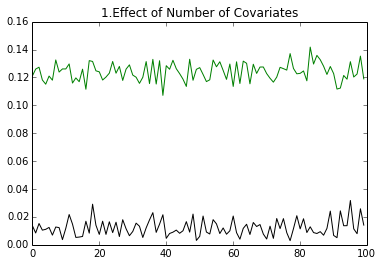

In [62]:
x = np.arange(100)
plt.plot(x, df_result['Ordinary_LeastSq'],color='k')
plt.plot(x, df_result['RidgeRegression'],color='g')
plt.title('1.Effect of Number of Covariates')
plt.show()